In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
#The breast cancer dataset is a classic and very easy binary classification dataset.
dataset = load_breast_cancer() 

#create the dataframe
df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
df.columns = columns
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
mr=df['mean radius']

<AxesSubplot: xlabel='mean radius'>

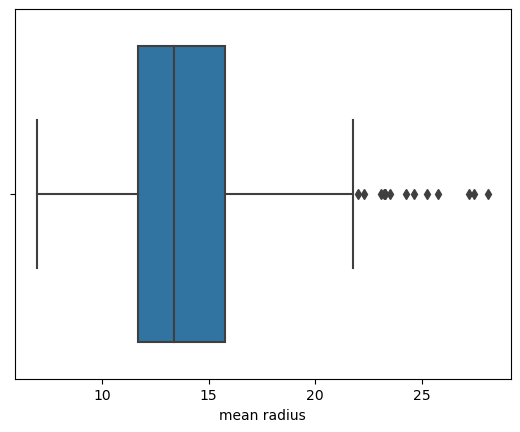

In [4]:
# We create a boxplot of the first columns called "mean radius"
sns.boxplot(data=df, x='mean radius')

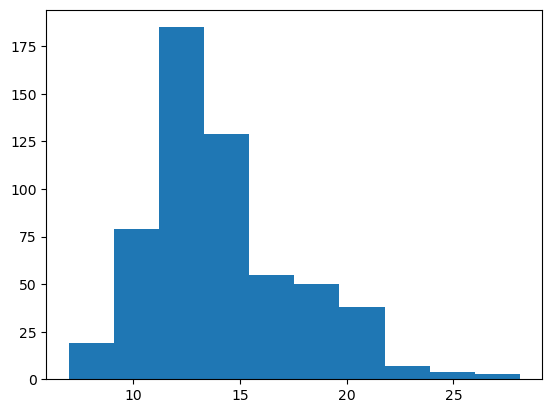

In [5]:
# We create the histogram 
plt.hist(mr)
plt.show()

In [6]:
# and check the main distribution  parameters
mr.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

In [7]:
# We scale the data 
df_mr=pd.DataFrame(mr)
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
scaler.fit(pd.DataFrame(df_mr)) 
mr_scaled=scaler.transform(df_mr)

In [8]:
# but we get a array of (single) arrays
mr_scaled[1:5,:]

array([[ 1.82982061],
       [ 1.57988811],
       [-0.76890929],
       [ 1.75029663]])

In [9]:
# so we "flatten" the array
mr_scaled=mr_scaled.flatten()
mr_scaled

array([ 1.09706398,  1.82982061,  1.57988811, -0.76890929,  1.75029663,
       -0.47637467,  1.17090767, -0.11851678, -0.32016686, -0.47353452,
        0.53755602,  0.46939261,  1.43220073,  0.4892736 , -0.11283649,
        0.117215  ,  0.15697699,  0.56879758,  1.61396982, -0.16679919,
       -0.29744572, -1.31308049,  0.34442636,  1.99738898,  0.71648496,
        0.85565191,  0.12857557,  1.27315278,  0.33306579,  0.97777802,
        1.27883307, -0.64962332,  0.82157021,  1.46060215,  0.56879758,
        0.74204624,  0.03485089, -0.31164643,  0.24502139, -0.18384004,
       -0.19520061, -0.90239596,  1.40379931, -0.24064288, -0.27188444,
        1.28451335, -1.68457106, -0.27188444, -0.58998034, -0.1809999 ,
       -0.67234446, -0.13839777, -0.62122191,  1.16238725,  0.27626295,
       -0.74050787,  1.4435613 ,  0.16549742, -0.30596615, -1.56471706,
       -1.12392703, -1.57039735,  0.03485089, -1.40708919, -0.4110514 ,
        0.18537841, -1.32415704, -0.80015085, -1.44798723, -0.38

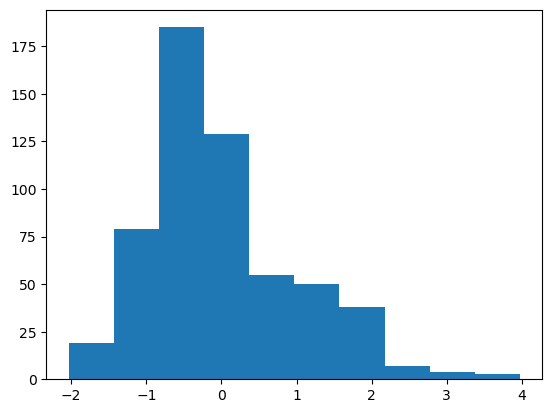

In [10]:
#Now is normalized!
plt.hist(mr_scaled)
plt.show()

In [11]:
# In order to check the distribution we can generate probability distributions and fit it to our specific data
# The library scipy.stats provide a set of tools for generate samples with a given theoretical prob. distribution
dist=scipy.stats.gamma
#dist = getattr(scipy.stats, 'norm')
param = dist.fit(mr_scaled)
param

(5.2522981710301195, -2.258530855286059, 0.43000801938966693)

In [12]:
# Clearly the normal that best approximate our data is with mean 0 and std 1 

### Test 1. Uniform distribution

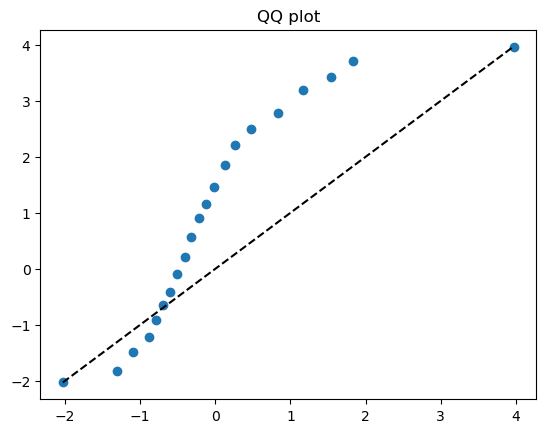

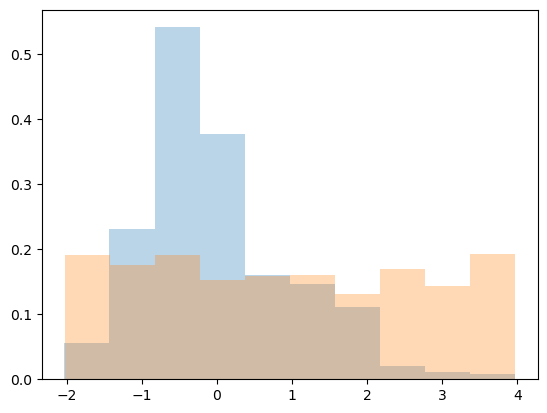

In [13]:
# A list of possible probability distributions
#dist_names = ['beta',
#              'expon',
#              'gamma',
#              'norm',
#              'uniform']

# We test a uniform distribution
dist = getattr(scipy.stats, 'uniform')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_a = np.percentile(mr_scaled, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

plt.hist(mr_scaled,alpha=.3,density=True)
plt.hist(test_dist,alpha=.3,density=True)
plt.show()

# The next plot show the comparison of a uniform distribution (as reference) respect to our empirical distribution  

We see that our distribution have more weight at the beginning of the interval respect to the end

### Test 2. Test Exponential distribution

In [14]:
sum(q_a/sum(q_a))

0.9999999999999987

In [15]:
param

(-2.0296483039857525, 6.000935950530862)

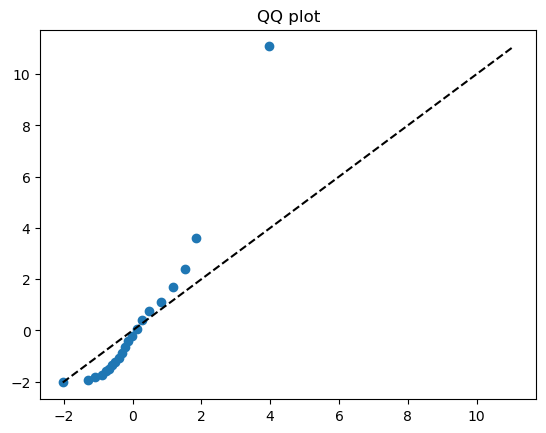

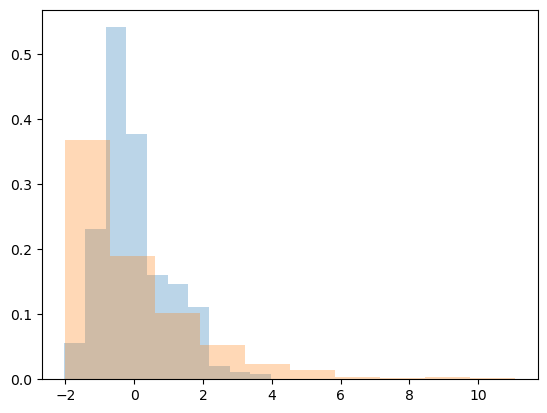

In [16]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'expon')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))
test_dist.sort()


# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_a = np.percentile(mr_scaled, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

plt.hist(mr_scaled,alpha=.3, density=True)
plt.hist(test_dist,alpha=.3, density=True)
plt.show()

In this case our distribution have less weight at the beggining of the interval respect to the reference distribution

### Test 3. The Gamma distribution 

In [17]:
param

(-2.0296483039857525, 2.0296483039857525)

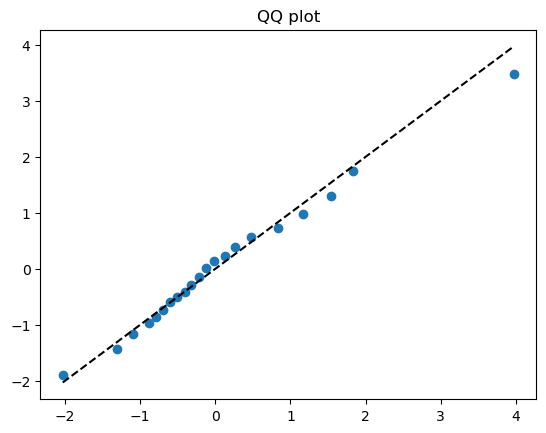

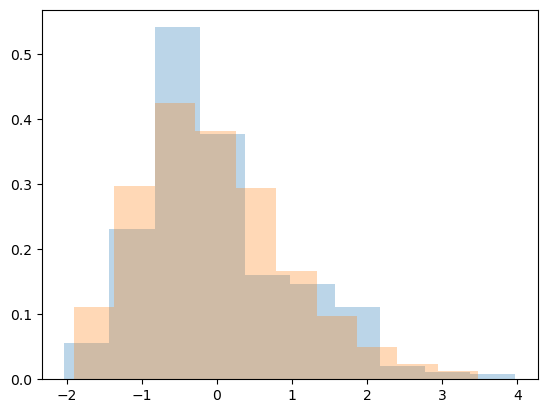

In [18]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'gamma')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_a = np.percentile(mr_scaled, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

plt.hist(mr_scaled,alpha=.3, density=True)
plt.hist(test_dist,alpha=.3, density=True)
plt.show()

Finally we see that the Gamma distribution fits our empirical data distribution  

In [19]:
# Kolmogorov-Smirnov Test
#    Test the distribution G(x) against a given distribution F(x).
#    Under the null hypothesis the two distributions are identical, G(x)=F(x).

from scipy import stats
stats.kstest(mr_scaled, test_dist)

KstestResult(statistic=0.05799648506151142, pvalue=0.2942556230641635)

## The normal distribution

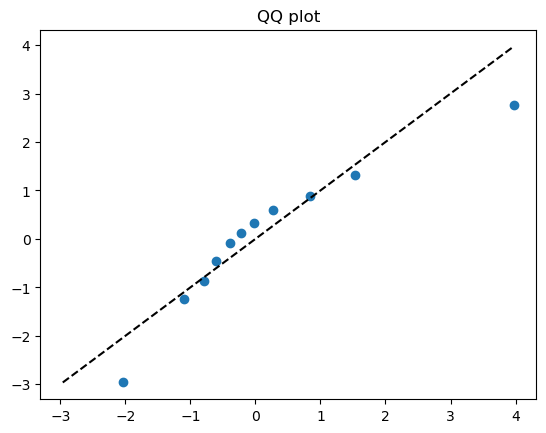

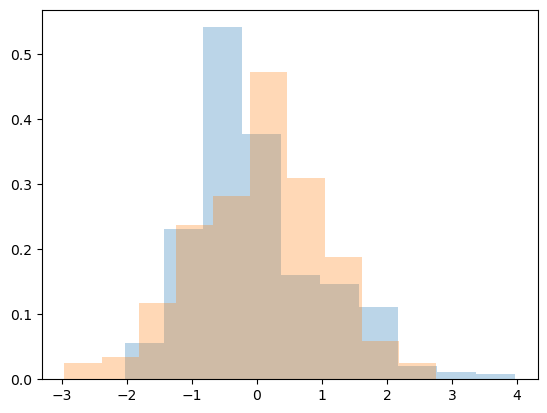

In [20]:
# We test a normal distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,11)
q_a = np.percentile(mr_scaled, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

plt.hist(mr_scaled,alpha=.3, density=True)
plt.hist(test_dist,alpha=.3, density=True)
plt.show()

/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

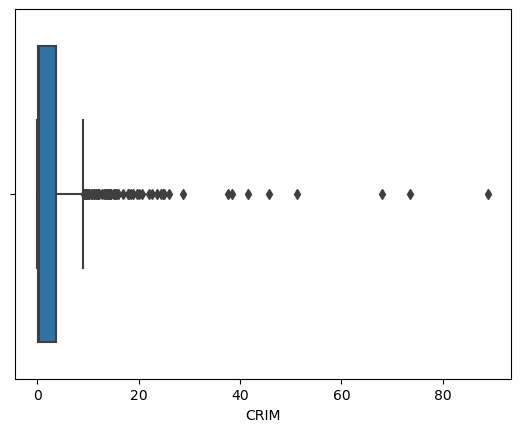

In [21]:
#OUTLIER DETECTION
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import scipy
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#DETECT AND REMOVE Outliers 
boston = load_boston()



#create the dataframe
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()


## check your data first 
df2=pd.DataFrame(boston_df["CRIM"])
mean2 = df2.mean()
sd2 = df2.std()

df2.describe()
sns.boxplot(x=boston_df.CRIM)


boston_df.CRIM
#df2.shape

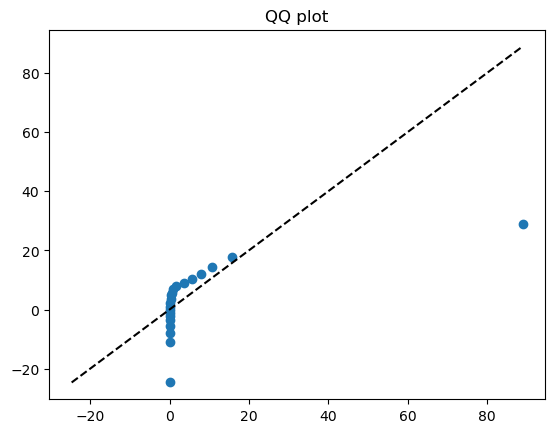

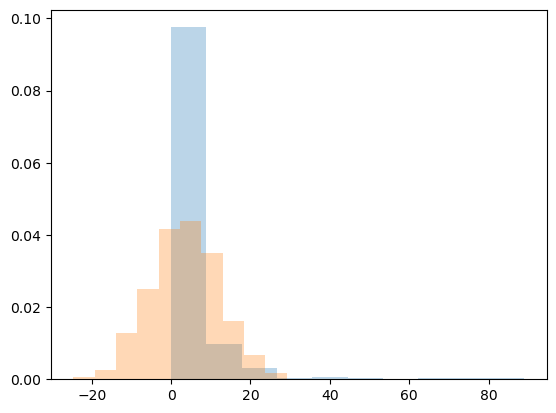

In [22]:
# A list of possible probability distributions
#dist_names = ['beta',
#              'expon',
#              'gamma',
#              'norm',
#              'uniform']

# We test a uniform distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(boston_df.CRIM)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(boston_df.CRIM))
test_dist.sort()

# We create the percentiles for both distributions
percs = np.linspace(0,100,21)
q_a = np.percentile(boston_df.CRIM, percs)
q_b = np.percentile(test_dist, percs)

# and generate the QQ-plot 
plt.plot(q_a,q_b, ls="", marker="o")
plt.title("QQ plot")
x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.show()

plt.hist(boston_df.CRIM,alpha=.3,density=True)
plt.hist(test_dist,alpha=.3,density=True)
plt.show()